In [1]:
import pandas as pd
import numpy as np

# Demand tab

## Electricity

In [2]:
d_e_nonscaled=pd.read_csv(r"EnergyPLAN files\Electricity\Hourly\el_demandBH_2020.txt",header=None,delimiter='\t',decimal=',')
d_eh_nonscaled=pd.read_csv(r"EnergyPLAN files\Heat\Hourly\demand_2020.txt",header=None,delimiter='\t',decimal=',')
d_ec_nonscaled=pd.read_csv(r"EnergyPLAN files\Heat\Hourly\CDD_BH_2020.txt",header=None,delimiter='\t',decimal=',')
d_transport_nonscaled=pd.read_csv(r"EnergyPLAN files\Transport\Hour_transport.txt",header=None,delimiter='\t',decimal=',')

In [3]:
d_e=d_e_nonscaled/d_e_nonscaled.sum(axis=0)
d_eh=d_eh_nonscaled/d_eh_nonscaled.sum(axis=0)
d_ec=d_ec_nonscaled/d_ec_nonscaled.sum(axis=0)
d_e_transport=d_transport_nonscaled/d_transport_nonscaled.sum(axis=0)

In [4]:
D_E=10.67#ann el demand TWh/ann
D_add=0.43
D_EH=2.9145+0.08/4.4 #HEAT PUMPS + EL HEATING
D_EC=0.2202
D_E_TRANSPORT=0.059

In [5]:
d_e_tot=D_E*d_e+D_add*d_e+D_E_TRANSPORT*d_e_transport-(D_EH*d_eh+D_EC*d_ec)
d_e_tot[d_e_tot[d_e_tot.columns[0]]<0]=0

In [6]:
d_e_tot.sum()

0    8.006118
dtype: float64

In [7]:
d_e_tot=d_e_tot.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
d_e_tot["Month"]=d_e_tot["Timestamp"].dt.month


In [8]:
(d_e_tot.groupby("Month")[0].mean())*1000000

Month
1      801.953595
2      829.401012
3      767.540468
4      812.632608
5      880.854279
6      991.665553
7     1011.064912
8      960.521048
9     1033.740844
10     991.081214
11     924.427906
12     930.907740
Name: 0, dtype: float64

## Heating and cooling

### Individual heating

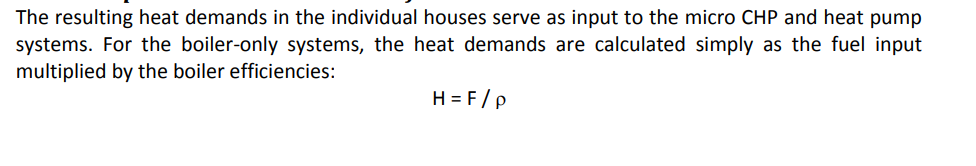

In [9]:
fuel_coal_domestic=1.15
fuel_oil_domestic=0.412#twh/ann
fuel_ngas_domestic=0.7125
fuel_biomass_domestic=13.47

rho_coal_dom=0.8
rho_oil_dom=0.85
rho_ngas_dom=0.9
rho_biomass_dom=0.9

H_coal_boiler=fuel_coal_domestic*rho_coal_dom*d_eh
H_oil_boiler=fuel_oil_domestic*rho_oil_dom*d_eh

H_ngas_boiler=fuel_ngas_domestic*rho_ngas_dom*d_eh
H_biomass_boiler=fuel_biomass_domestic*rho_biomass_dom*d_eh #0.9 is efficiency

In [10]:
print("Kotao na ugalj, domaćinstva",H_coal_boiler.sum(),"TWh/god")
print("Kotao na tečno gorivo, domaćinstva",H_oil_boiler.sum(),"TWh/god")
print("Kotao na prirodni gas, domaćinstva",H_ngas_boiler.sum(),"TWh/god")
print("Kotao na biomasu, domaćinstva",H_biomass_boiler.sum(),"TWh/god")

Kotao na ugalj, domaćinstva 0    0.92
dtype: float64 TWh/god
Kotao na tečno gorivo, domaćinstva 0    0.3502
dtype: float64 TWh/god
Kotao na prirodni gas, domaćinstva 0    0.64125
dtype: float64 TWh/god
Kotao na biomasu, domaćinstva 0    12.123
dtype: float64 TWh/god


### District heating

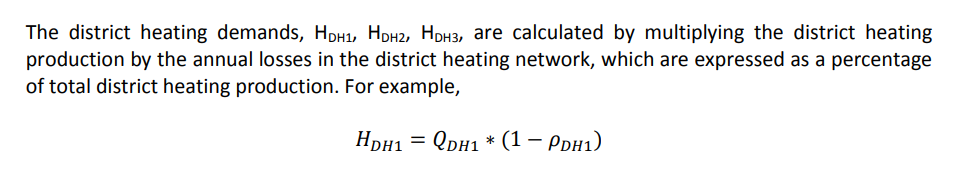
production_hourly=demand*ann production
demand=production*losses

In [11]:
Q_dh=1.12916666666667 #TWh/god
rho_dh=0.3
Q_chp=0.495833333333333 #TWh/god
rho_chp=0.3


In [12]:
q_dh_hourly=Q_dh*d_eh
q_chp_hourly=Q_chp*d_eh

In [13]:
h_dh=Q_dh*rho_dh*d_eh
h_chp=Q_chp*rho_chp*d_eh


In [14]:
h_dh,h_chp=h_dh.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H")),h_chp.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
h_dh["Month"],h_chp["Month"]=h_dh["Timestamp"].dt.month,h_chp["Timestamp"].dt.month


q_dh_hourly,q_chp_hourly=q_dh_hourly.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H")),q_chp_hourly.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
q_dh_hourly["Month"],q_chp_hourly["Month"]=q_dh_hourly["Timestamp"].dt.month,q_chp_hourly["Timestamp"].dt.month

In [15]:
(q_dh_hourly.groupby("Month")[0].mean())*1000000+(q_chp_hourly.groupby("Month")[0].mean())*1000000

Month
1     390.629616
2     306.640727
3     283.328209
4     190.173915
5     113.623502
6      70.461656
7      47.979097
8      40.552911
9      61.742908
10    146.804056
11    255.761816
12    314.874332
Name: 0, dtype: float64

In [16]:
(q_dh_hourly.groupby("Month")[0].mean())*1000000

Month
1     271.437503
2     213.075993
3     196.876781
4     132.146490
5      78.953767
6      48.961817
7      33.339321
8      28.179074
9      42.903405
10    102.009998
11    177.721672
12    218.797292
Name: 0, dtype: float64

In [300]:
(q_chp_hourly.groupby("Month")[0].mean())*1000000

Month
1     119.192114
2      93.564735
3      86.451428
4      58.027425
5      34.669735
6      21.499839
7      14.639776
8      12.373837
9      18.839503
10     44.794058
11     78.040144
12     96.077040
Name: 0, dtype: float64

Kapacitet CHP je 82 MW, tako da će se CHP proizvodnja koja je po distribuciji veća od 82 MW skalirati postaviti na 82 MW.

In [331]:
q_chp_hourly.loc[q_chp_hourly[0]>82/1000000,0]=82/1000000

In [332]:
e_th_chp=q_chp_hourly

In [334]:
(e_th_chp.groupby("Month")[0].mean())*1000000

Month
1     80.514868
2     75.427330
3     72.090675
4     53.297953
5     34.663807
6     21.499839
7     14.639776
8     12.373837
9     18.839503
10    44.551195
11    66.856220
12    76.190397
Name: 0, dtype: float64

In [337]:
e_th_chp.sum()#TWh

0            0.417311
Month    57216.000000
dtype: float64

In [19]:
h_chp.sum()

0            0.14875
Month    57216.00000
dtype: float64

## Industry and other fuel consumption

In [20]:
f_i_coal=2.46527777777778 #twh/ann
f_i_oil=1.31888888888889
f_i_n_gas=0.888611111111111
f_i_biomass=0.200277777777778
#various
f_v_coal=5.82888888888889 #twh/ann
f_v_oil=1.86583333333333
f_v_n_gas=1.07194444444444
f_v_biomass=0.390833333333333

n_gasloss=0.00722222222222222
n_gas_nonscaled=pd.read_csv(r"EnergyPLAN files\Gas\Hourly\GAS_BH_2021.txt",header=None,delimiter='\t',decimal=',')
d_n_gas_ind_var=n_gas_nonscaled/n_gas_nonscaled.sum(axis=0)
g_n_gas_ind_var=(f_i_n_gas+f_v_n_gas)*d_n_gas_ind_var
d_n_gas_ind_var=d_n_gas_ind_var.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
d_n_gas_ind_var["Month"]=d_n_gas_ind_var["Timestamp"].dt.month

## Transport

In [21]:
ft_jf=0.0438343333333333#twh/ann
ft_diesel=11.6462377777778
ft_petrol=1.7351625
ft_ngas=0.0124667589301038
ft_LPG=0.807653333333333
transpot_n_gas_nonscaled=pd.read_csv(r"EnergyPLAN files\Gas\Hourly\const.txt",header=None,delimiter='\t',decimal=',')
d_n_gas_transport=transpot_n_gas_nonscaled/transpot_n_gas_nonscaled.sum(axis=0)
d_n_gas_transport=(ft_ngas)*d_n_gas_transport
d_n_gas_transport=d_n_gas_transport.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
d_n_gas_transport["Month"]=d_n_gas_transport["Timestamp"].dt.month

In [22]:
km_kwh_diesel=1.5
km_kwh_petrol=1.5
km_kwh_ngas=1.5
km_kwh_lpg=1.5
km_kwh_el=5

In [23]:
print("Billions diesel",km_kwh_diesel*ft_diesel)
print("Billions petrol",km_kwh_petrol*ft_petrol)
print("Billions ngas",km_kwh_ngas*ft_ngas)
print("Billions lpg",km_kwh_lpg*ft_LPG)
print("Billions el",km_kwh_el*D_E_TRANSPORT)


Billions diesel 17.4693566666667
Billions petrol 2.60274375
Billions ngas 0.018700138395155698
Billions lpg 1.2114799999999994
Billions el 0.295


# Supply 

## Heat and electricity

In [24]:
C_pp1=1058 #MW
mi_pp1_eff=0.2923
C_chp_el=443
C_chp_th=82
mi_chp_eff=0.2116
rho_chp_eff=0.4725#thermal

## Central power production

In [25]:

C_pp2=832.11 #MW
mi_pp2_eff=0.232299201880824

C_hydro=1684.9 #MW CAPACITY
mi_hydro=0.81279792 #efficiency
W_hydro=5.26143078712603 #water supply
S_hydro=6705.472 #GWh/ann
d_hydro_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Hydro\hydroBH_2020.txt",header=None,delimiter='\t',decimal=',')
d_hydro=d_hydro_nonscaled/d_hydro_nonscaled.sum(axis=0)
w_hydro=W_hydro*d_hydro #hourly dist in TW

### Hydropower production

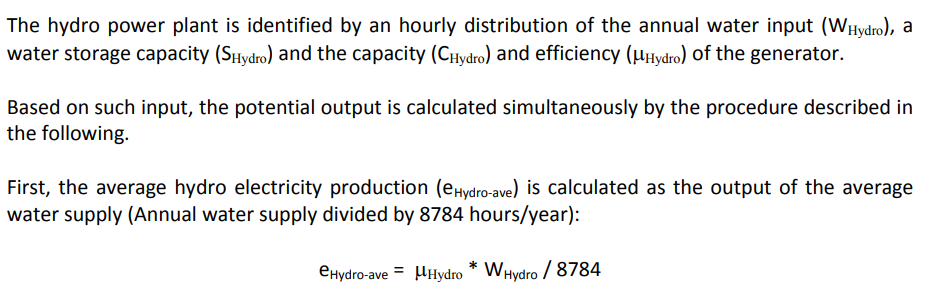

In [26]:
e_hydro_ave=(W_hydro*mi_hydro)/8784 #tw

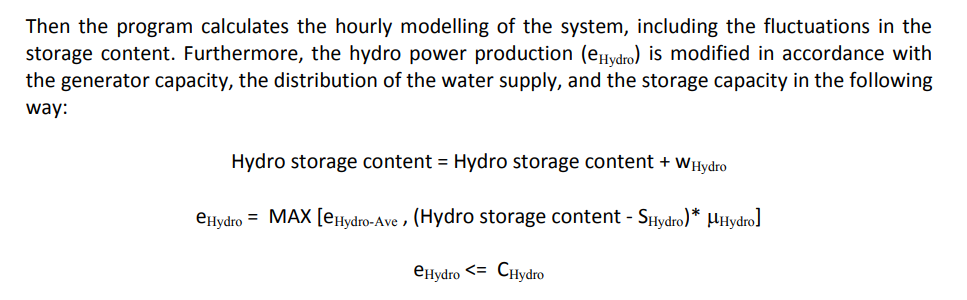

In [27]:
range1=np.arange(49,100,0.5)
percent_storage_cap_begin=0.5
percent_storage_cap_end=0.5
Hydro_storage_cont=(S_hydro*percent_storage_cap_begin+w_hydro*1000)#GW
k=0
while (k<len(range1)):
    if round(Hydro_storage_cont.values[0][0],0)==round(Hydro_storage_cont.values[8784][0],0):
        print(range1[k])
        Hydro_storage_cont=Hydro_storage_cont
        break
    else:
        Hydro_storage_cont=(S_hydro*range1[k]/100+w_hydro*1000)
    k=k+1

53.5


In [28]:
e_hydro_ave*1000000 #MW

486.84881602914385

In [29]:
e_hydro=np.zeros(len(Hydro_storage_cont))
for k in range(len(Hydro_storage_cont)):
    e_hydro[k]=max(e_hydro_ave*1000000,(Hydro_storage_cont.values[k]-S_hydro)*mi_hydro*1000)
    e_hydro[k]=min(e_hydro[k],C_hydro)

In [30]:
print("Potential annual production",e_hydro.sum()/1000000,"TWh")

Potential annual production 4.276966848816028 TWh


In [31]:
e_hydro=pd.DataFrame(e_hydro)
e_hydro=e_hydro.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2021-01-01 00:00:00", freq="1H"))
e_hydro["Month"]=e_hydro["Timestamp"].dt.month

In [32]:
(e_hydro.groupby("Month")[0].mean())

Month
1     486.848816
2     486.848816
3     486.848816
4     486.848816
5     486.848816
6     486.848816
7     486.848816
8     486.848816
9     486.848816
10    486.848816
11    486.848816
12    486.848816
Name: 0, dtype: float64

## RES

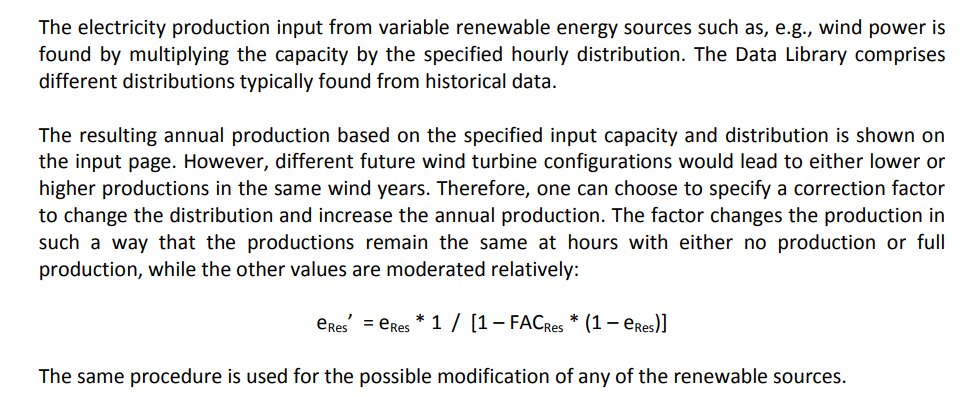

In [33]:
C_wind=86.6
C_PV=34.89
C_riv=172.19

d_wind_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Wind\Wind_2020.txt",header=None,delimiter='\t',decimal=',')
d_solar_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Solar\SolarBH_2020.txt",header=None,delimiter='\t',decimal=',')
d_river_nonscaled=pd.read_csv(r"EnergyPLAN files\Supply\Hydro\hydroBH_2020.txt",header=None,delimiter='\t',decimal=',')

In [34]:
d_wind=d_wind_nonscaled/d_wind_nonscaled.max(axis=0)
d_solar=d_solar_nonscaled/d_solar_nonscaled.max(axis=0)
d_river=d_river_nonscaled/d_river_nonscaled.max(axis=0)

FAC_wind=0
FAC_solar=0
FAC_river=0

In [35]:
e_wind_non_corr=C_wind*d_wind
e_solar_non_corr=C_PV*d_solar
e_river_non_corr=C_riv*d_river

In [36]:
e_wind_corr=e_wind_non_corr*1/(1-FAC_wind*(1-e_wind_non_corr))
e_solar_corr=e_solar_non_corr*1/(1-FAC_solar*(1-e_solar_non_corr))
e_river_corr=e_river_non_corr*1/(1-FAC_river*(1-e_river_non_corr))

In [37]:
e_wind_corr=e_wind_corr.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
e_wind_corr["Month"]=e_wind_corr["Timestamp"].dt.month

e_solar_corr=e_solar_corr.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
e_solar_corr["Month"]=e_solar_corr["Timestamp"].dt.month


e_river_corr=e_river_corr.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2021-01-01 00:00:00", freq="1H"))
e_river_corr["Month"]=e_river_corr["Timestamp"].dt.month

In [38]:
(e_river_corr.groupby("Month")[0].mean())#MW

Month
1     74.701595
2     54.264195
3     70.842619
4     30.680114
5     20.121598
6     35.445266
7     38.257167
8     33.802933
9     41.806613
10    57.108320
11    60.935342
12    78.722081
Name: 0, dtype: float64

In [39]:
(e_solar_corr.groupby("Month")[0].mean())#MW

Month
1      6.801332
2      7.670904
3      8.410681
4     10.967249
5      9.669117
6     11.682848
7     13.319944
8     11.792627
9      9.984286
10     7.891040
11     6.846972
12     3.399933
Name: 0, dtype: float64

In [40]:
(e_wind_corr.groupby("Month")[0].mean())#MW

Month
1     18.498640
2     22.510627
3     28.827916
4     18.990012
5     20.670483
6     12.046398
7     10.325512
8     12.273973
9     15.411954
10    15.677118
11    17.346523
12    27.121586
Name: 0, dtype: float64

## Fuel distribution

In [41]:
f_coal_dh=0.6525#twh/ann
f_oil_dh=0.0180555555555556
f_ngas_dh=0.483611111111111
f_biomass_dh=0.374722222222222

f_coal_chp=0.9425
f_biomass_chp=0.0497222222222222

f_coal_pp1=16.6387820311111#twh/ann
f_coal_pp2=22.7637458811111
f_oil_pp2=0.14
f_ngas_pp2=0.0672222
f_biomass_pp2=0.0186111

In [42]:
co2_coal=115 #kg/GJ
co2_fuel_oil_diesel=72.6
co2_ngas=63
co2_LPG=72
co2_waste=0#quest

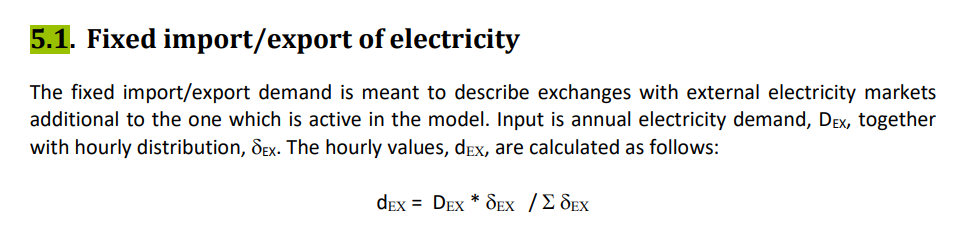

In [43]:
d_ex=0
d_pump=0
d_hydropump=0 #modifv

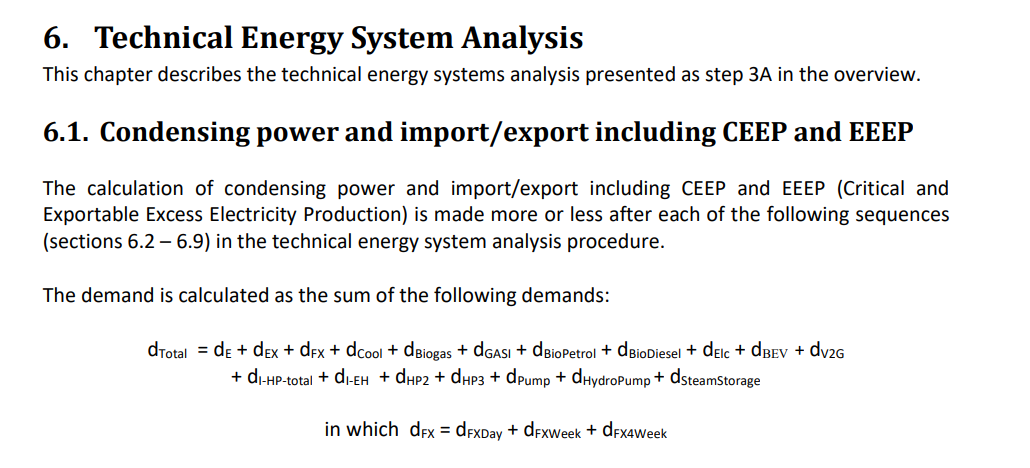

In [56]:
d_tot_all=(D_E*d_e+D_add*d_e+d_ex+D_E_TRANSPORT*d_e_transport-(D_EH*d_eh+D_EC*d_ec)+d_pump+d_hydropump)*1000000

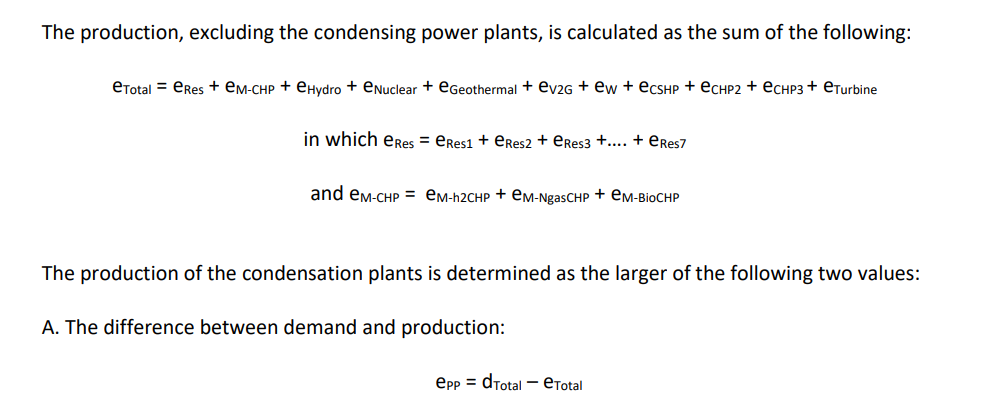

In [349]:
d_ehx=d_eh_nonscaled[0]/d_eh_nonscaled[0].max(axis=0)

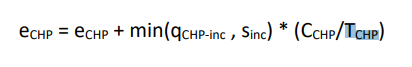

In [356]:
e_chp=(443)*d_ehx/0.4725

In [357]:
e_chp=pd.DataFrame(dd).assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31 23:00:00", freq="1H"))
e_chp["Month"]=dd["Timestamp"].dt.month

In [358]:
e_chp.groupby("Month")[0].mean()

Month
1     600.297465
2     471.228098
3     435.402741
4     292.248499
5     174.610161
6     108.281481
7      73.731558
8      62.319416
9      94.883003
10    225.600156
11    393.040270
12    483.881036
Name: 0, dtype: float64

Maksimalni kapacitet za električnu energiju je 443 MW, pa će se sve vrijednosti iznad postaviti na 443

In [359]:
e_chp.loc[e_chp[0]>443,0]=443

In [360]:
e_chp.sum()/1000000#TWh

0        2.170991
Month    0.057216
dtype: float64

In [361]:
e_chp3=e_chp
e_turbine=0

In [362]:
e_tot=e_solar_corr[0]+e_wind_corr[0]+e_river_corr[0]+e_hydro[0]+e_chp3[0]+e_turbine

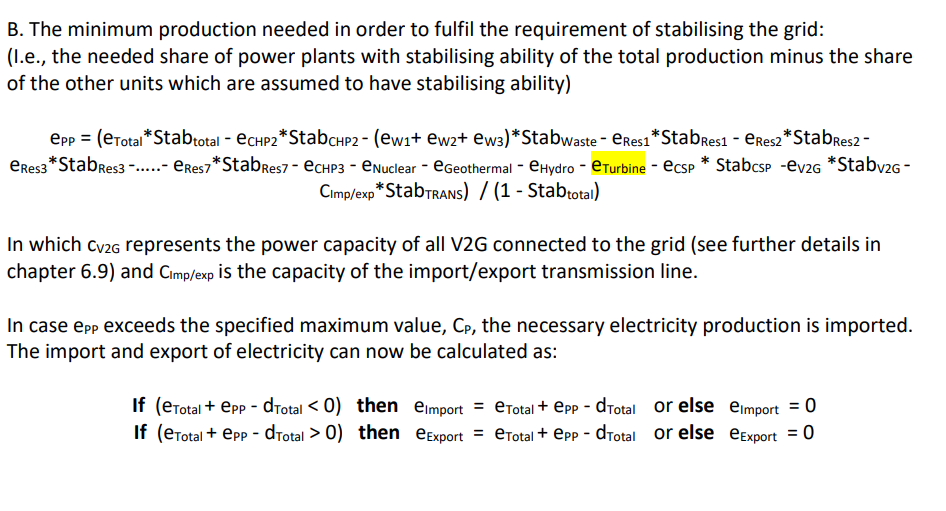

In [ ]:
check1=e_tot+e_pp-d_tot